<a href="https://colab.research.google.com/github/Yi-Wei-Lin/Tibame_ML_20210602/blob/main/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from urllib.request import urlretrieve
url = "https://github.com/Elwing-Chou/ml0602/raw/main/titanic/train.csv"
urlretrieve(url, "train.csv")
url = "https://github.com/Elwing-Chou/ml0602/raw/main/titanic/test.csv"
urlretrieve(url, "test.csv")

('test.csv', <http.client.HTTPMessage at 0x7faf2169b390>)

In [3]:
import pandas as pd
train_df = pd.read_csv("train.csv", encoding="utf-8")
test_df = pd.read_csv("test.csv", encoding="utf-8")

In [4]:
data = pd.concat([train_df, test_df], ignore_index=True)
data = data.drop(["PassengerId", "Survived"], axis=1)
data

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...
1304,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [5]:
na = data.isna().sum()
# Series[帶入跟你的資料筆數一樣多True/False list]
# na[na>0] 是篩選操作
na[na>0].sort_values(ascending=False) # ascending=False 降序 True 升序

Cabin       1014
Age          263
Embarked       2
Fare           1
dtype: int64

In [6]:
# s = pd.Series([1,2,3])
# def func(n):
#   return n * n
# s.apply(lambda  n:n*n) #lambda(無名函式):如果只使用一次&功能行數不多, 可以用 lambda

In [7]:
def cabin_head(s):
  if not pd.isna(s):
    return s[0]
data["Cabin"] = data["Cabin"].apply(cabin_head)

In [8]:
dic = data["Ticket"].value_counts()
data["Ticket"] = data["Ticket"].apply(lambda t:dic[t])

In [9]:
# 補缺失值(類別:最常出現)[!如果一堆測試資料, 不要重算, 直接補S]
most = data["Embarked"].value_counts().idxmax()  #找 index 最大值
data["Embarked"] = data["Embarked"].fillna(most)
na = data.isna().sum()
na[na>0].sort_values(ascending=False)

Cabin    1014
Age       263
Fare        1
dtype: int64

In [10]:
# 補缺失值(數值:中位數)
med = data.median().drop(["Pclass"])
data = data.fillna(med)
na = data.isna().sum()
na[na>0].sort_values(ascending=False)

Cabin    1014
dtype: int64

In [11]:
def name_convert(s):
  # s = "Braund, Mr. Owen Harris"
  s = s.split(",")[-1].split(".")[0]
  s = s.strip()
  return s
counts = data["Name"].apply(name_convert).value_counts()
whitelist = counts[counts > 50].index #白名單, 其他項目太少就去掉了, ex:船長,大副等等
def name_convert(s):
  s = s.split(",")[-1].split(".")[0]
  s = s.strip()
  if s in whitelist:
    return s
  else:
    return None
data["Name"] = data["Name"].apply(name_convert)

In [12]:
data = pd.get_dummies(data)
data = pd.get_dummies(data, columns=["Pclass"])
data

,Age,SibSp,Parch,Ticket,Fare,Name_Master,Name_Miss,Name_Mr,Name_Mrs,Sex_female,Sex_male,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,22.0,1,0,1,7.2500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
1,38.0,1,0,2,71.2833,0,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0
2,26.0,0,0,1,7.9250,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
3,35.0,1,0,2,53.1000,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0
4,35.0,0,0,1,8.0500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,28.0,0,0,1,8.0500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
1305,39.0,0,0,3,108.9000,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0
1306,38.5,0,0,1,7.2500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
1307,28.0,0,0,1,8.0500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1


In [13]:
# 模型建立完, 後續的嘗試, 老師嘗試過了, 所以直接做.
data["Family"] = data["SibSp"] + data["Parch"]
data

,Age,SibSp,Parch,Ticket,Fare,Name_Master,Name_Miss,Name_Mr,Name_Mrs,Sex_female,Sex_male,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3,Family
0,22.0,1,0,1,7.2500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1
1,38.0,1,0,2,71.2833,0,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1
2,26.0,0,0,1,7.9250,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
3,35.0,1,0,2,53.1000,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,1
4,35.0,0,0,1,8.0500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,28.0,0,0,1,8.0500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
1305,39.0,0,0,3,108.9000,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0
1306,38.5,0,0,1,7.2500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
1307,28.0,0,0,1,8.0500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0


In [14]:
print(len(data))
print(data.shape)

1309
(1309, 26)


In [15]:
# .loc (根據列編號), .iloc(根據第幾個)(O)
# .iloc [第一列, 第二列, ...]
x_train = data.iloc[:train_df.shape[0]]
y_train = train_df["Survived"]
x_predict = data.iloc[train_df.shape[0]:]
# x_train
# x_predict

In [16]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from sklearn.model_selection import GridSearchCV
# params = {
#     #1.5, 2.[1,2,3], 3.range
#     #20~99
#     "n_estimators":range(20,100),
#     #3~10
#     "max_depth":range(3,11)
# }
# clf = RandomForestClassifier()
# cv = GridSearchCV(clf, params, cv=10, n_jobs=-1) #參數搜尋
# cv.fit(x_train, y_train)
# print(cv.best_score_)
# print(cv.best_params_)

In [22]:
clf = RandomForestClassifier(n_estimators=88, max_depth=6)
scores = cross_val_score(clf, x_train, y_train, cv=10, n_jobs=-1)
print("10:", scores)
print("average:", np.average(scores))

10: [0.81111111 0.86516854 0.76404494 0.88764045 0.84269663 0.82022472
 0.84269663 0.78651685 0.85393258 0.85393258]
average: 0.832796504369538


In [23]:
clf = RandomForestClassifier(n_estimators=88, max_depth=6)
clf.fit(x_train, y_train)
pre = clf.predict(x_predict)
df = pd.DataFrame({
    "PassengerId":test_df["PassengerId"],
    "Survived":pre
})
df.to_csv("rf.csv", encoding="utf-8", index=False)
df

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


88


[Text(321.9230769230769, 475.65000000000003, 'Name_Mrs <= 0.5\ngini = 0.469\nsamples = 548\nvalue = [557, 334]\nclass = Dead'),
 Text(171.69230769230768, 339.75, 'Pclass_3 <= 0.5\ngini = 0.414\nsamples = 468\nvalue = [534, 221]\nclass = Dead'),
 Text(85.84615384615384, 203.85000000000002, 'Sex_female <= 0.5\ngini = 0.487\nsamples = 198\nvalue = [183, 133]\nclass = Dead'),
 Text(42.92307692307692, 67.94999999999999, '\n  (...)  \n'),
 Text(128.76923076923077, 67.94999999999999, '\n  (...)  \n'),
 Text(257.53846153846155, 203.85000000000002, 'Sex_male <= 0.5\ngini = 0.321\nsamples = 270\nvalue = [351, 88]\nclass = Dead'),
 Text(214.61538461538458, 67.94999999999999, '\n  (...)  \n'),
 Text(300.46153846153845, 67.94999999999999, '\n  (...)  \n'),
 Text(472.15384615384613, 339.75, 'Cabin_G <= 0.5\ngini = 0.281\nsamples = 80\nvalue = [23, 113]\nclass = Alived'),
 Text(429.23076923076917, 203.85000000000002, 'Ticket <= 5.5\ngini = 0.264\nsamples = 79\nvalue = [21, 113]\nclass = Alived'),
 Te

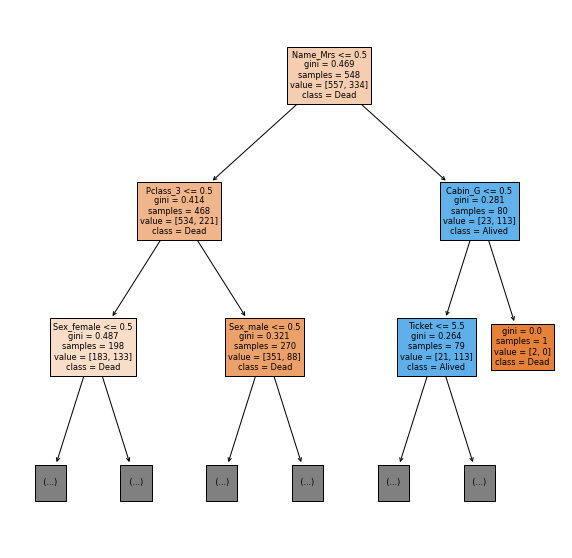

In [28]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
print(len(clf.estimators_))
plt.figure(figsize=(10,10))
plot_tree(clf.estimators_[1], #選看哪一棵樹
      feature_names=data.columns,
      class_names=["Dead","Alived"],
      max_depth=2,
      filled=True)

In [ ]:
pd.DataFrame({
    "Name":data.columns,
    "importance":clf.feature_importances_
    }).sort_values(by="importance", ascending=False)

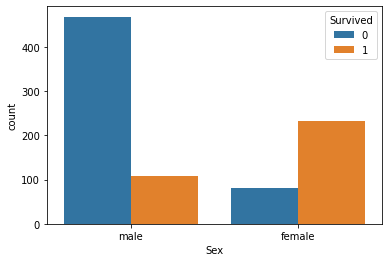

In [30]:
import seaborn as sns
sns.countplot(x=train_df["Sex"], hue=train_df["Survived"])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

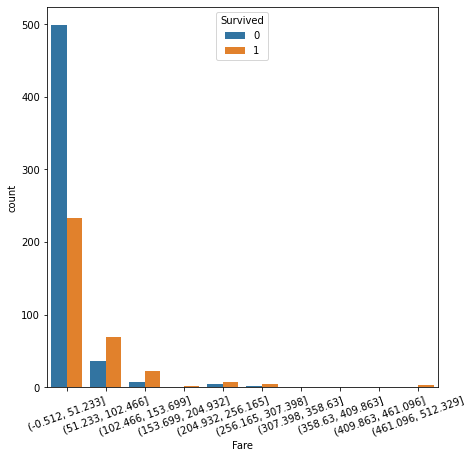

In [39]:
plt.figure(figsize=(7,7))
c = pd.cut(train_df["Fare"], bins=10)
sns.countplot(c, hue=train_df["Survived"])
# sns.histplot(train_df["Fare"])
plt.xticks(rotation=20)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

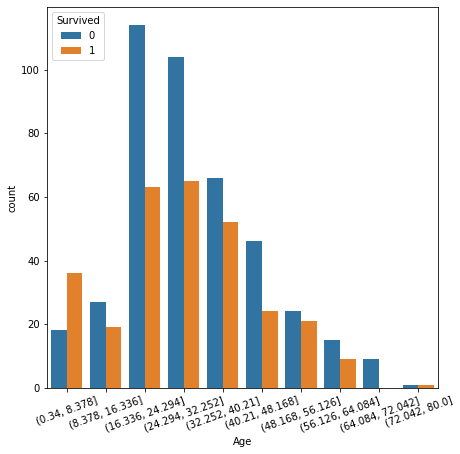

In [40]:
plt.figure(figsize=(7,7))
c = pd.cut(train_df["Age"], bins=10)
sns.countplot(c, hue=train_df["Survived"])
# sns.histplot(train_df["Fare"])
plt.xticks(rotation=20)

In [19]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler # 計算距離, 需要做 scalering, 否則會變爛, 演算法跟演算法選擇差距不大
scaler = MinMaxScaler()
data_scale = scaler.fit_transform(data)
data_scale = pd.DataFrame(data_scale, columns=data.columns)
x_train_scale = data_scale.iloc[:train_df.shape[0]]
x_predict_scale = data_scale.iloc[train_df.shape[0]:]
x_train_scale

,Age,SibSp,Parch,Ticket,Fare,Name_Master,Name_Miss,Name_Mr,Name_Mrs,Sex_female,Sex_male,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3,Family
0,0.273456,0.125,0.000000,0.0,0.014151,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.1
1,0.473882,0.125,0.000000,0.1,0.139136,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.1
2,0.323563,0.000,0.000000,0.0,0.015469,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.436302,0.125,0.000000,0.1,0.103644,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.1
4,0.436302,0.000,0.000000,0.0,0.015713,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0.336089,0.000,0.000000,0.0,0.025374,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
887,0.235876,0.000,0.000000,0.0,0.058556,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
888,0.348616,0.125,0.222222,0.3,0.045771,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.3
889,0.323563,0.000,0.000000,0.0,0.058556,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [20]:
from sklearn.neighbors import KNeighborsClassifier # 計算距離, 需要做 scalering, 否則會變爛, 演算法跟演算法選擇差距不大
params = {
    "n_neighbors":range(3,100),
}
clf = KNeighborsClassifier()
cv = GridSearchCV(clf, params, cv=10, n_jobs=-1) #參數搜尋
cv.fit(x_train_scale, y_train)
print(cv.best_score_)
print(cv.best_params_)

0.832796504369538
{'n_neighbors': 7}


In [21]:
clf = KNeighborsClassifier(n_neighbors=11) # 11是老師測試比較好的成績 80%
clf.fit(x_train_scale, y_train)
pre = clf.predict(x_predict_scale)
df = pd.DataFrame({
    "PassengerId":test_df["PassengerId"],
    "Survived":pre
})
df.to_csv("knn.csv", encoding="utf-8", index=False)
df

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
